# Coefficient Trajectories for ElasticNet Trained on Rocks versus Mines Data

In [2]:
from math import sqrt, fabs, exp
import matplotlib.pyplot as plt
from sklearn.linear_model import enet_path
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import seaborn as sns

sns.set()

In [3]:
x_list = []
data_path = './data/sonar.all-data'

with open(data_path) as data:
    
    for line in data:
        # split on comma
        row = line.strip().split(',')
        x_list.append(row)

# separate labels from attributes, convert attributes from string to numeric and convert 'M' to 1 and 'R' to 0
x_num = []
labels = []

for row in x_list:
    last_col = row.pop()
    
    if last_col == 'M':
        labels.append(1.0)
        
    else:
        labels.append(0.0)
        
    attr_row = [float(elt) for elt in row]
    x_num.append(attr_row)
    
# number of rows and columns in x matrix
n_row = len(x_num)
n_col = len(x_num[1])

alpha = 1.0

# calculate means and variances
x_means = []
x_sd = []

for i in range(n_col):
    col = [x_num[j][i] for j in range(n_row)]
    mean = sum(col)/n_row
    x_means.append(mean)

    col_diff = [(x_num[j][i] - mean) for j in range(n_row)]
    sum_sq = sum([col_diff[i] ** 2 for i in range(n_row)])
    std_dev = sqrt(sum_sq/n_row)
    x_sd.append(std_dev)
    
# use calculated means and standard eviation to normalize x_num
x_normalized = []

for i in range(n_row):
    row_normalized = [(x_num[i][j] - x_means[j])/x_sd[j] for j in range(n_col)]
    x_normalized.append(row_normalized)
    
# normalize labels to center
mean_label = sum(labels)/n_row
sd_label = sqrt(sum([(labels[i] - mean_label) ** 2 for i in range(n_row)])/n_row)
label_normalized = [(labels[i] - mean_label)/sd_label for i in range(n_row)]

In [4]:
# Convert normalized labels to numpy array
Y = np.array(label_normalized)

# Convert normalized attributes to numpy array
X = np.array(x_normalized)

alphas, coefs, _ = enet_path(X, Y, l1_ratio=0.8, fit_intercept=False, return_models=False)

/home/michael/.virtualenvs/ml_in_py-5Jtq3_sG/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


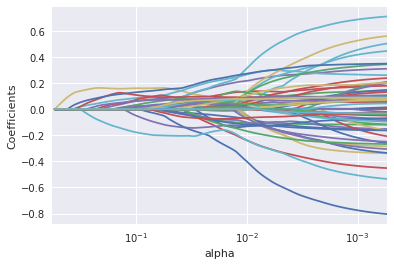

In [5]:
plt.plot(alphas, coefs.T)
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.semilogx()
ax = plt.gca()
ax.invert_xaxis()
plt.show()

In [6]:
n_attr, n_alpha = coefs.shape

# find coefficient ordering
nz_list = []

for i_alpha in range(1, n_alpha):
    coef_list = list(coefs[:, i_alpha])
    nz_coef = [index for index in range(n_attr) if coef_list[index] != 0.0]
    
    for q in nz_coef:
        
        if not (q in nz_list):
            nz_list.append(q)
            
# make up names for columns of X
names = [f'V{i}' for i in range(n_col)]
name_list = [names[nz_list[i]] for i in range(len(nz_list))]

print('Attributes Ordered by How Early They Enter the Model')
print(name_list)

Attributes Ordered by How Early They Enter the Model
['V10', 'V48', 'V11', 'V44', 'V35', 'V51', 'V20', 'V3', 'V21', 'V45', 'V43', 'V15', 'V0', 'V22', 'V27', 'V50', 'V53', 'V30', 'V58', 'V56', 'V28', 'V39', 'V46', 'V19', 'V54', 'V29', 'V57', 'V6', 'V8', 'V7', 'V49', 'V2', 'V23', 'V37', 'V55', 'V4', 'V13', 'V36', 'V38', 'V26', 'V31', 'V1', 'V34', 'V33', 'V24', 'V16', 'V17', 'V5', 'V52', 'V41', 'V40', 'V59', 'V12', 'V9', 'V18', 'V14', 'V47', 'V42']


In [7]:
# find coefficients corresponding to best alpha value.  alpha value corresponding to normalized x and normalized y is 0.020334883589342503
alpha_star = 0.020334883589342503
index_lt_alpha_star = [index for index in range(100) if alphas[index] > alpha_star]
index_star = max(index_lt_alpha_star)

# here's the set of coefficients to deploy
coef_star = list(coefs[:, index_star])
print('Best Coefficient Values')
print(coef_star)

Best Coefficient Values
[0.082258256813769109, 0.002061988722005787, -0.11828642590856257, 0.16633956932499719, 0.0042854388193730398, -0.0, -0.043662524745941823, -0.077515104879429267, 0.10000054356324115, 0.0, 0.090617207036272823, 0.21210870399916268, -0.0, -0.010655386149820836, -0.0, -0.13328659558143735, -0.0, 0.0, 0.0, 0.052814854501417728, 0.038531154796712604, 0.0035515348181946083, 0.090854714680372609, 0.030316113904029419, -0.0, 0.0, 0.0086195542357476486, 0.0, 0.0, 0.1749767925727288, -0.22156878046172804, 0.012614243827941234, 0.0, -0.0, 0.0, -0.17160601809439657, -0.080450013824211408, 0.078096790041519232, 0.022035287616765917, -0.072184409273691158, 0.0, -0.0, 0.0, 0.057018816876248261, 0.09647826568573141, 0.03991736763721826, 0.049158231541633478, 0.0, 0.22671917920123322, -0.096272735479948732, 0.0, 0.078886784332227011, 0.0, 0.06231282175575735, -0.08278551071329486, 0.014466967172068012, -0.074326527525632832, 0.06809647597425883, 0.070488864435476709, 0.0]


In [8]:
# The coefficients on normalized attributes give another slightly different ordering
abs_coef = [abs(a) for a in coef_star]

# sort by magnitude
coef_sorted = sorted(abs_coef, reverse=True)
idx_coef_size = [abs_coef.index(a) for a in coef_sorted if a != 0.0]

names_list2 = [names[idx_coef_size[i]] for i in range(len(idx_coef_size))]

print('Attributes Ordered by Coef Size at Optimum alpha')
print(names_list2)

Attributes Ordered by Coef Size at Optimum alpha
['V48', 'V30', 'V11', 'V29', 'V35', 'V3', 'V15', 'V2', 'V8', 'V44', 'V49', 'V22', 'V10', 'V54', 'V0', 'V36', 'V51', 'V37', 'V7', 'V56', 'V39', 'V58', 'V57', 'V53', 'V43', 'V19', 'V46', 'V6', 'V45', 'V20', 'V23', 'V38', 'V55', 'V31', 'V13', 'V26', 'V4', 'V21', 'V1']
